# US Air Pollution Kaggle EDA

This is an exploratory data analysis. In this notebook, I explore the US Pollution dataset from Kaggle.

## Table of Contents

1. Importing required Python libraries
2. Dataset description
3. Importing the dataset
4. Overview of the dataset
5. Univariate analysis
6. Multivariate analysis

## 1. Importing required Python libraries

In this exploratory data analysis, I will need NumPy, Pandas, and Matplotlib (for visualization). (May also need Seaborn later on for more in-depth visualization)

In [259]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

## 2. Dataset description

For this project, I used the US pollution dataset from Kaggle. It can be found here:

https://www.kaggle.com/datasets/sogun3/uspollution/data

It contains data on the daily amount of four pollutants found in different areas throughout the United States, from 2000 to 2016. These pollutants are: Nitrogen Dioxide (NO2), Sulphur Dioxide (SO2), Carbon Monoxide (CO) and Ozone (O3). 

The dataset contains 1746661 number of data points and 28 number of attributes. 

The attribute information is as follows:

1. State Code
2. County Code
3. Site Num
4. Address
5. State
6. County
7. City
8. Date Local
9. NO2 Units
10. NO2 Mean
11. NO2 1st Max Value
12. NO2 1st Max Hour
13. NO2 AQI (Air Quality Index)
14. O3 Units
15. O3 Mean
16. O3 1st Max Value
17. O3 1st Max Hour
18. O3 AQI (Air Quality Index)
19. SO2 Units
20. SO2 Mean
21. SO2 1st Max Value
22. SO2 1st Max Hour
23. SO2 AQI (Air Quality Index)
24. CO Units
25. CO Mean
26. CO 1st Max Value
27. CO 1st Max Hour
28. CO AQI (Air Quality Index)

I will be focusing primarily on the AQI of each of the 4 pollutants. As per AirNow.gov, air quality index (AQI) is used to report air quality and is separated into 6 main categories: Green (good), Yellow (moderate), Orange (unhealthy for sensitive groups), Red (unhealthy), Purple (very unhealthy), and Maroon (hazardous). 

## 3. Importing the dataset

In [260]:
pollution = pd.read_csv('pollution_us_2000_2016.csv', index_col = 0)
pollution.head()

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,22.958333,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


## 4. Overview of the dataset

In this section I will learn about the dimensions, structure, and columns of the dataset.  

### df.shape
Using the __df.shape__ function, I can check the dimensions of the dataset.

In [261]:
pollution.shape

(1746661, 28)

__Interpretation__

The dataset has 1746661 rows and 12 columns.

### df.columns
I can use __df.columns__ to view all of the column names.   

In [262]:
pollution.columns

Index(['State Code', 'County Code', 'Site Num', 'Address', 'State', 'County',
       'City', 'Date Local', 'NO2 Units', 'NO2 Mean', 'NO2 1st Max Value',
       'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units', 'O3 Mean',
       'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')

### dropping unnecessary columns

For this project, I am choosing to focus mainly on the AQI. Therefore, I will need to drop the columns regarding units, mean, 1st max value, and 1st max value, keeping only the AQI columns. Furthermore, I will also drop the columns `State Code`, `County Code`, `Site Num`, and `Address` because they seem to be irrelevant to my analysis. To do this, I can use the __df.drop()__ method.

In [263]:
df = pollution.drop(columns=['NO2 Units', 'NO2 Mean', 'NO2 1st Max Value', 'NO2 1st Max Hour','O3 Units', 'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'SO2 Units', 'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour','CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'State Code', 'County Code', 'Site Num', 'Address'])

__Interpretation__

The dataframe df now only has columns on AQI for each of the pollutants and other relevant columns such as `State`, `County`, `City`, and `Date Local`.

### df.head() and df.tail()
Using __df.head()__ and __df.tail()__, I can preview the first 5 and bottom 5 rows of the dataset. As seen here, there are only 12 columns left after dropping unecessary columns.

In [264]:
df.head()

,State,County,City,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Arizona,Maricopa,Phoenix,2000-01-01,46,34,13.0,NaN
1,Arizona,Maricopa,Phoenix,2000-01-01,46,34,13.0,25.0
2,Arizona,Maricopa,Phoenix,2000-01-01,46,34,NaN,NaN
3,Arizona,Maricopa,Phoenix,2000-01-01,46,34,NaN,25.0
4,Arizona,Maricopa,Phoenix,2000-01-02,34,27,4.0,NaN


In [265]:
df.tail()

,State,County,City,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
24599,Wyoming,Laramie,Not in a city,2016-03-30,1,44,NaN,1.0
24600,Wyoming,Laramie,Not in a city,2016-03-31,1,44,0.0,NaN
24601,Wyoming,Laramie,Not in a city,2016-03-31,1,44,0.0,1.0
24602,Wyoming,Laramie,Not in a city,2016-03-31,1,44,NaN,NaN
24603,Wyoming,Laramie,Not in a city,2016-03-31,1,44,NaN,1.0


### df.info()

I can view basic information about the dataset using __df.info()__, like all of the column names, indexes, and datatypes of each column.

In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1746661 entries, 0 to 24603
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   State       object 
 1   County      object 
 2   City        object 
 3   Date Local  object 
 4   NO2 AQI     int64  
 5   O3 AQI      int64  
 6   SO2 AQI     float64
 7   CO AQI      float64
dtypes: float64(2), int64(2), object(4)
memory usage: 119.9+ MB


__Interpretation__

The data type of the 'Date Local' column is object, or string. I want to convert it to a datetime type using the Pandas __to_datetime()__ function.

In [267]:
df['Date Local'] = pd.to_datetime(df['Date Local'], format = '%Y-%m-%d')

Now checking the datatype of the `Date Local` column again, I should see that it is datetime64. 

In [268]:
df.dtypes

State                 object
County                object
City                  object
Date Local    datetime64[ns]
NO2 AQI                int64
O3 AQI                 int64
SO2 AQI              float64
CO AQI               float64
dtype: object

### missing values

To check for how many null values there are in the whole dataset, I can use __df.isnull().sum()__.

In [269]:
df.isnull().sum()

State              0
County             0
City               0
Date Local         0
NO2 AQI            0
O3 AQI             0
SO2 AQI       872907
CO AQI        873323
dtype: int64

__Interpretation__

As seen here, most of the rows have 0 null values. However, the columns `SO2 AQI` and `CO AQI` have a large number of null values- nearly half of each column is null. I will drop the rows with null values using the __dropna()__ method.

In [270]:
df = df.dropna(axis=0)
df.shape

(436876, 8)

Now I am only left with 436876 rows, compared to the 1746661 ones originally.

### df.describe()

I will now use the __df.describe()__ method, which will reveal important statistical information about the data including the count, mean, standard deviation, min, median, and max.

In [271]:
df.describe()

,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
count,436876,436876.000000,436876.000000,436876.000000,436876.000000
mean,2008-10-14 01:46:43.720964608,23.899230,36.049204,7.117386,5.996258
min,2000-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000
25%,2004-11-23 00:00:00,12.000000,25.000000,1.000000,2.000000
50%,2009-02-04 00:00:00,23.000000,33.000000,3.000000,5.000000
75%,2012-11-06 00:00:00,33.000000,42.000000,9.000000,8.000000
max,2016-05-31 00:00:00,132.000000,218.000000,200.000000,201.000000
std,NaN,15.163655,19.779243,11.939231,5.851589


And to view information about the columns with datatype as object, I can use the method __df.describe(include = ['object'])__. It will reveal information about the count, number of unique values, and value with the highest frequency.

In [272]:
df.describe(include = ['object'])

,State,County,City
count,436876,436876,436876
unique,47,133,144
top,California,Los Angeles,Not in a city
freq,144109,23405,34619


__Interpretation__

I can see that the data has 47 different states, 133 counties, 144 cities, and 204 addresses. This dataset has the most data from California, especially the Los Angeles county.

## 5. Univariate analysis

I will plot the `NO2 AQI`, `O3 AQI`, `SO2 AQI`, and `CO AQI` columns as box plots in order to look at the distribution of the dataset. It will allow me to visualize the median, max, min, and interquartile range of each of the columns.

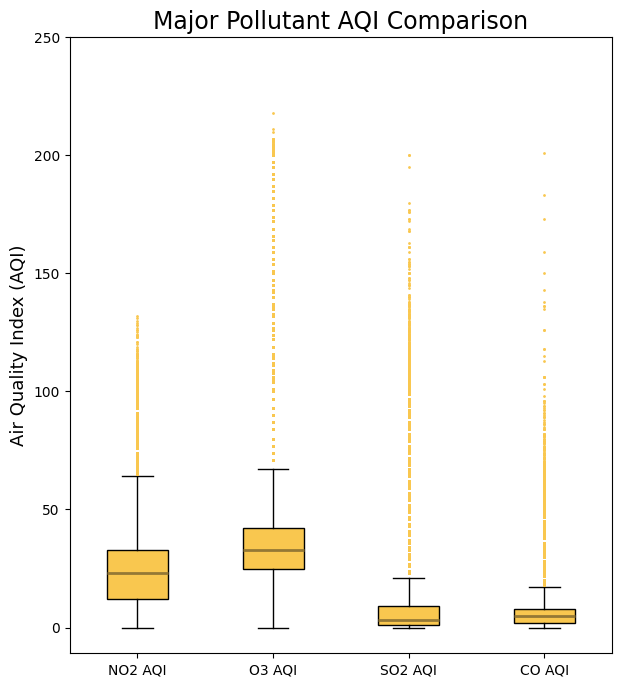

In [273]:
plt.figure(figsize = (7,8))

# plotting the boxplots for all 4 columns
labels = ['NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']
medianprops = dict(color='#947835', linewidth=2)    # modifying median characteristics
flierprops = dict(markeredgecolor = '#f9c74f', markersize=1)    # modifying flier (outlier) characteristics
boxprops = dict(facecolor =  '#f9c74f')     # modifying inner color of each box
boxes = plt.boxplot([df['NO2 AQI'], df['O3 AQI'], df['SO2 AQI'], df['CO AQI']], tick_labels=labels, patch_artist=True, boxprops=boxprops, medianprops = medianprops, flierprops = flierprops)

# changing the title
plt.title('Major Pollutant AQI Comparison', fontdict={'fontsize':17})

# changing the y-label
plt.ylabel('Air Quality Index (AQI)', fontdict={'fontsize':13})

# making the step size of the y-ticks 50
plt.yticks(np.arange(0, 251, step = 50))

# customizing the inner color of the box plots
# for box in boxes['boxes']:
#     box.set(facecolor = '#C9E9DF')

plt.show()

__Conclusion__

As seen by from this box plot graph, all four of the major pollutants' AQI medians are under 50, which falls into the "good" category for air quality. The medians of the NO2 and O3 AQI box plots are higher than the boxes of SO2 and CO AQI. Furthermore, the SO2 and CO AQI box plots have smaller ranges than the NO2 and O3 AQI box plots, indicating that the data for SO2 and CO AQI are less dispersed. 

We can also see that all four of the pollutants' AQI many outliers, including extreme outliers. The largest outlier of NO2 AQI is much closer to the median compared to the largest outlier of any of the other three pollutants.

Lastly, all four of the box plots indicate that the NO2, O3, SO2, and CO AQI data are positively skewed. To confirm this, I will use the skew() method on each of the major pollutant AQIs.

In [274]:
df['NO2 AQI'].skew()

np.float64(0.8876834509874199)

In [275]:
df['O3 AQI'].skew()

np.float64(2.439107077521321)

In [276]:
df['SO2 AQI'].skew()

np.float64(3.8946971468705303)

In [277]:
df['CO AQI'].skew()

np.float64(3.67256847818267)

__Interpretation__

I can see here that because all four of the skewness values are greater than 0.5, they are positively skewed. The skewnewss of the NO2 AQI variable is between 0.5 and 1, making it moderately positively skewed. Meanwhile, the skewness of the `O3 AQI`, `SO2 AQI`, and `CO AQI` variables are all greater than 1. Therefore, we can conclude that the data for those three pollutants are highly positively skewed.

I will continue by plotting a histogram for each of the pollutant AQI variables to verify this. 

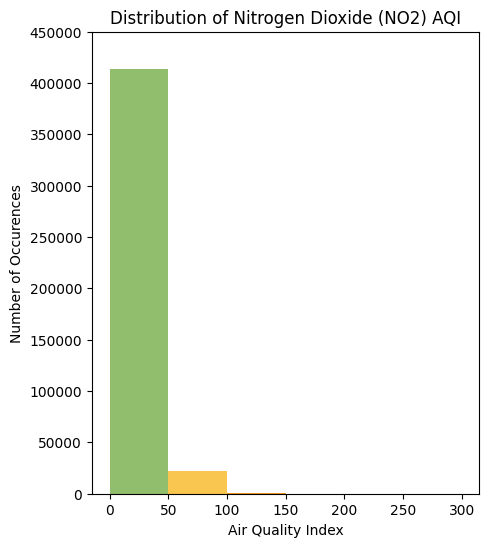

In [278]:
plt.figure(figsize = (5,6))

bins = np.arange(0, 301, 50)
n, bins, patches = plt.hist(df['NO2 AQI'], bins=bins)
plt.title('Distribution of Nitrogen Dioxide (NO2) AQI')
plt.xlabel('Air Quality Index', fontdict={'fontsize':10})
plt.ylabel('Number of Occurences', fontdict={'fontsize':10})
plt.yticks(np.arange(0,450001, 50000))

patches[0].set_facecolor('#90be6d')
patches[1].set_facecolor('#f9c74f')
patches[2].set_facecolor('#f8961e')
patches[3].set_facecolor('#f94144')


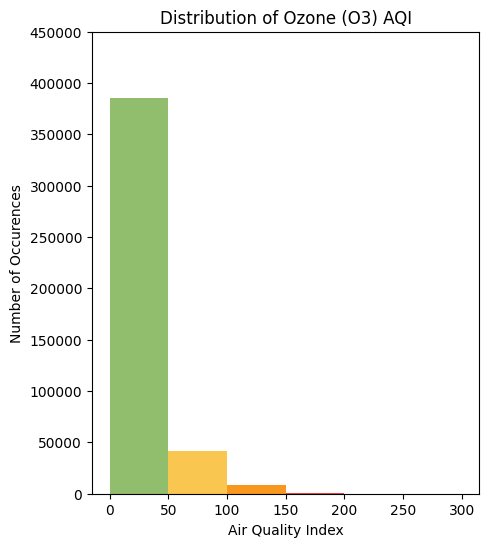

In [279]:
plt.figure(figsize = (5,6))

bins = np.arange(0, 301, 50)
n, bins, patches = plt.hist(df['O3 AQI'], bins=bins)
plt.title('Distribution of Ozone (O3) AQI')
plt.xlabel('Air Quality Index', fontdict={'fontsize':10})
plt.ylabel('Number of Occurences', fontdict={'fontsize':10})
plt.yticks(np.arange(0,450001, 50000))

patches[0].set_facecolor('#90be6d')
patches[1].set_facecolor('#f9c74f')
patches[2].set_facecolor('#f8961e')
patches[3].set_facecolor('#f94144')

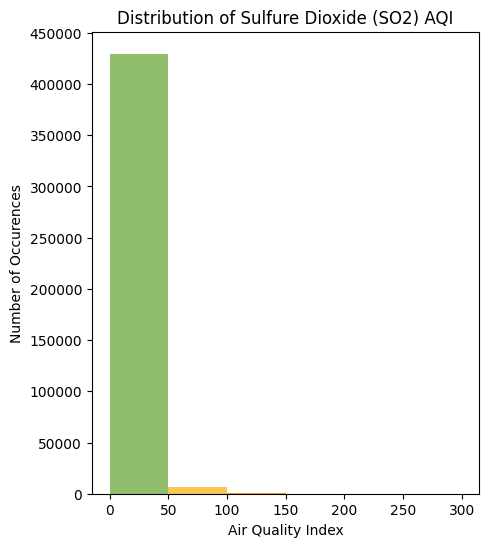

In [280]:
plt.figure(figsize = (5,6))

bins = np.arange(0, 301, 50)
n, bins, patches = plt.hist(df['SO2 AQI'], bins=bins)
plt.title('Distribution of Sulfure Dioxide (SO2) AQI')
plt.xlabel('Air Quality Index', fontdict={'fontsize':10})
plt.ylabel('Number of Occurences', fontdict={'fontsize':10})
plt.yticks(np.arange(0,450001, 50000))

patches[0].set_facecolor('#90be6d')
patches[1].set_facecolor('#f9c74f')
patches[2].set_facecolor('#f8961e')
patches[3].set_facecolor('#f94144')


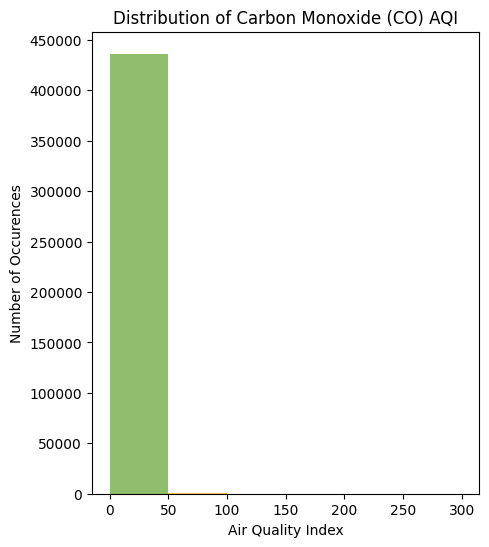

In [281]:
plt.figure(figsize = (5,6))

bins = np.arange(0, 301, 50)
n, bins, patches = plt.hist(df['CO AQI'], bins=bins)
plt.title('Distribution of Carbon Monoxide (CO) AQI')
plt.xlabel('Air Quality Index', fontdict={'fontsize':10})
plt.ylabel('Number of Occurences', fontdict={'fontsize':10})
plt.yticks(np.arange(0,450001, 50000))

patches[0].set_facecolor('#90be6d')
patches[1].set_facecolor('#f9c74f')
patches[2].set_facecolor('#f8961e')
patches[3].set_facecolor('#f94144')

__Conclusion__

Based on the four above histograms, I can confirm that all four of the pollutant AQI data are positively skewed and that the `O3 AQI` data has the greatest number of extreme outliers.

## 6. Multivariate analysis

### Examine relationship between AQI variables and State attribute

In this section, I will explore the relationship between each of the NO2, O3, SO2, and CO AQI variables and the `State` attribute.

### Visualization of AQI variables and State atrribute

#### NO2 AQI and State

For each of the pollutant AQI variables, I will determine the mean AQI for each category (state) in the `State` column. First, I will need to create a dataframe containing only the columns `NO2 AQI` and `State`.

In [282]:
no2 = df.loc[:,['NO2 AQI', 'State']]
no2.head()

,NO2 AQI,State
1,46,Arizona
5,34,Arizona
9,48,Arizona
13,72,Arizona
17,58,Arizona


To find the mean AQI of each state, I can use the __groupby())__ and __mean()__ methods on my `no2` dataframe. I will sort the results from greatest to least using __sort_values()__.

In [283]:
no2_mean = no2.groupby('State').mean().sort_values('NO2 AQI', ascending=False)  # this will return a df, but 'State' will be the index
no2_mean = no2_mean.reset_index()       # used to reset the index and make 'State' a column
no2_mean.head(10)

,State,NO2 AQI
0,Country Of Mexico,37.933277
1,Arizona,36.106818
2,Colorado,35.961709
3,Michigan,31.851490
4,New Jersey,31.677091
5,District Of Columbia,30.597885
6,New York,30.581480
7,Massachusetts,29.778458
8,Missouri,29.166363
9,Illinois,28.378829


I want to plot the top 10 states with the highest mean `NO2 AQI`. To do this, I will create a bar chart.

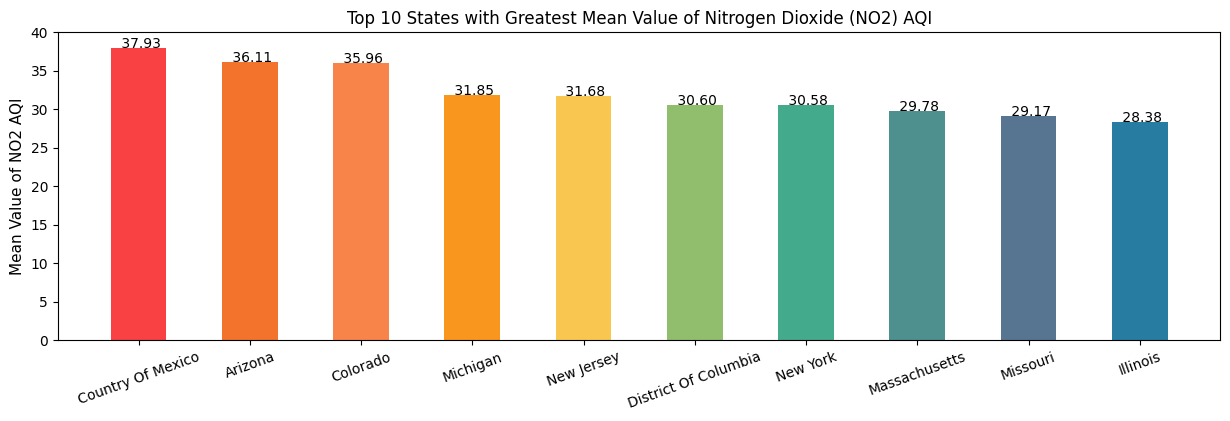

In [284]:
plt.figure(figsize= (15,4))

# method to add the number values at the top center of each bar
def addValues(labels,values):
    for i in range(len(labels)):
        plt.text(i, values[i], f'{values[i]: .2f}', ha = 'center')  
    # text(x location, y location, string, horizontal alignment)

# Setting the labels and values for the graph as the first 10 rows
labels = no2_mean.loc[0:9, 'State']
values = no2_mean.loc[0:9, 'NO2 AQI']
color = ['#f94144', '#f3722c', '#f9844a', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1']

# Creating the bar graph
plt.bar(labels, values, width = 0.5, color = color)
plt.title('Top 10 States with Greatest Mean Value of Nitrogen Dioxide (NO2) AQI')
plt.ylabel('Mean Value of NO2 AQI', fontdict={'fontsize':11})
plt.yticks(np.arange(0,41,5))
plt.xticks(fontsize=10, rotation=20)  # change font size of the x labels

addValues(labels, values)


plt.show()

__Conclusion__

As demonstrated by the graph above, the top 10 states with the highest mean `NO2 AQI` are Mexico, Arizona, Colorado, Michigan, New Jersey, District of Columnbia, New York, Massachusetts, Missouri, and Illinois. Comparing the #1 state (Country of Mexico) and #10 state (Illinois), the difference in mean AQI is nearly 10 (37.93-28.38 = 9.55).

I now want to determine how many AQI values greater than 50 each state has, since an AQI of 51 or greater is considered to be 'moderate level of concern' or worse.

In [285]:
no2_greater_51 = pd.DataFrame(no2[no2['NO2 AQI'] > 50]['State'].value_counts())
no2_greater_51 = no2_greater_51.reset_index()
no2_greater_51.head(10)

,State,count
0,California,9597
1,Arizona,2322
2,New York,1442
3,Colorado,1324
4,Texas,1058
5,Pennsylvania,925
6,Illinois,774
7,New Jersey,529
8,Country Of Mexico,514
9,District Of Columbia,360


I will now plot the top 10 states with the highest number of `NO2 AQI` values greater than 50 on a bar graph.

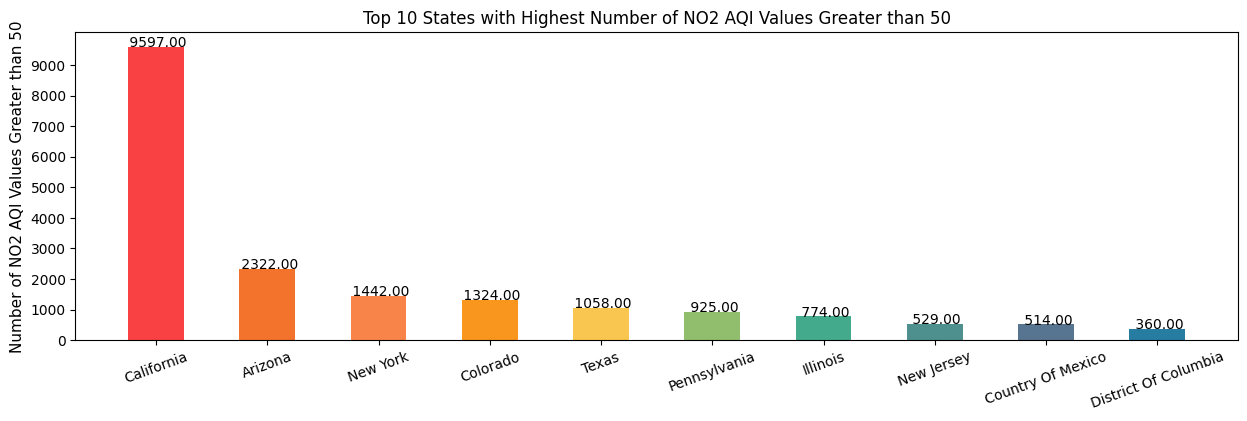

In [300]:
plt.figure(figsize= (15,4))

# Setting the labels and values for the graph as the first 10 rows of no2_greater_51
labels = no2_greater_51.loc[0:9, 'State']
values = no2_greater_51.loc[0:9, 'count']
color = ['#f94144', '#f3722c', '#f9844a', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1']

# Creating the bar graph
plt.bar(labels, values, width = 0.5, color = color)
plt.title('Top 10 States with Highest Number of NO2 AQI Values Greater than 50')
plt.ylabel('Number of NO2 AQI Values Greater than 50', fontdict={'fontsize':11})
plt.yticks(np.arange(0,10000,1000))
plt.xticks(fontsize=10, rotation=20)  # change font size of the x labels

addValues(labels, values)


plt.show()

__Conclusion__

California has a much higher number of `NO2 AQI` greater than 50 (moderate elvel of concern or worse) compared to any of the other states. However, this result may be due to a higher number of data values collected from the state California.

To check this, I an use the groupby() and value_counts() functions. 

In [305]:
no2['State'].value_counts().head(10)

State
California        144109
Pennsylvania       47278
Texas              30807
New York           17624
Arizona            17469
Illinois           12536
North Carolina      9282
Virginia            9107
Arkansas            8832
Colorado            8801
Name: count, dtype: int64

__Interpretation__

This confirms that in the dataframe `no2`, California has a significantly higher number of value points than any other state. The next few leading states with highest number of data points are Pennsylvania, Texas, New York, Arizona, and Illinois, all of which are in the top 10 states with highest number of NO2 AQI values greater than 50. 

I can conclude that determining which states have the higher number of AQI values greater than 50 is an unreliable procedure due to certain states having a greater number of data points in the dataset.

#### O3 AQI and State

In [312]:
# Create a dataframe containing only O3 AQI and State columns, finding the mean O3 AQI for each state and sorting from greatest to least
o3_mean = df.loc[:,['O3 AQI', 'State']].groupby('State').mean().sort_values('O3 AQI', ascending=False) 
o3_mean = o3_mean.reset_index()       # used to reset the index and make 'State' a column
o3_mean.head(10)

,State,O3 AQI
0,Tennessee,45.365319
1,North Carolina,44.370394
2,Kentucky,43.018498
3,Utah,42.293955
4,Missouri,41.906610
5,Indiana,41.589486
6,Wyoming,41.444649
7,New Mexico,41.327548
8,Oklahoma,41.029135
9,Nevada,40.502270


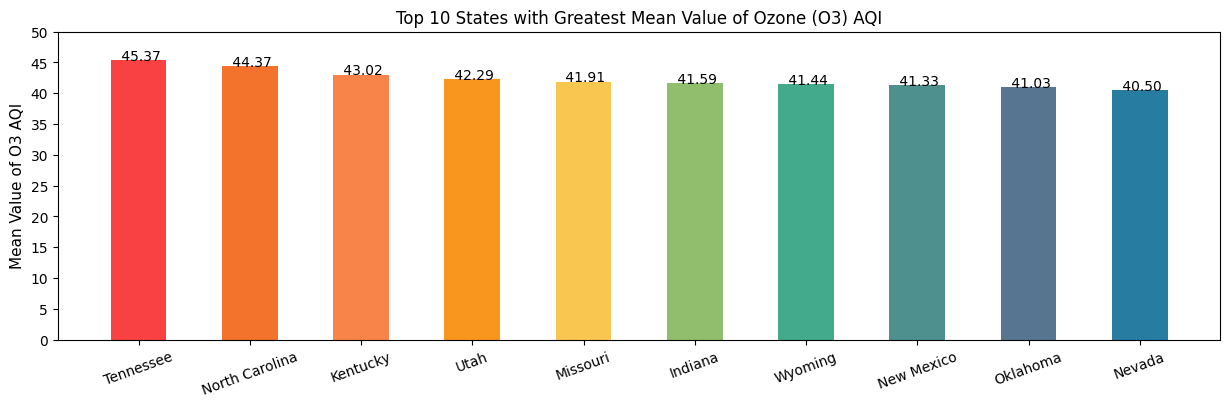

In [314]:
plt.figure(figsize= (15,4))

# Setting the labels and values for the graph as the first 10 rows
labels = o3_mean.loc[0:9, 'State']
values = o3_mean.loc[0:9, 'O3 AQI']
color = ['#f94144', '#f3722c', '#f9844a', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1']

# Creating the bar graph
plt.bar(labels, values, width = 0.5, color = color)
plt.title('Top 10 States with Greatest Mean Value of Ozone (O3) AQI')
plt.ylabel('Mean Value of O3 AQI', fontdict={'fontsize':11})
plt.yticks(np.arange(0,51,5))
plt.xticks(fontsize=10, rotation=20)  # change font size of the x labels

addValues(labels, values)


plt.show()

__Conclusion__

The top 10 states with the highest mean `O3 AQI` are Tennessee, North Carolina, Kentucky, Utah, Missouri, Indiana, Wyoming, New Mexico, Oklahoma, and Nevada. The top 10 states here differ greatly from the top 10 states with highest mean `NO2 AQI`. Additionally, the #1 state for mean `O3 AQI` (Tennessee) has a greater mean AQI than the #1 state for mean `NO2 AQI` (Country of Mexico), with the values being 45.37 and 37.93 respectively. The #1 state for mean `O3 AQI` (Tennessee) and #10 state (Nevada) only have a difference in mean `O3 AQI` of 4.87 (45.37-40.50). 

#### SO2 AQI and State

In [315]:
# Create a dataframe containing only SO2 AQI and State columns, finding the mean SO2 AQI for each state and sorting from greatest to least
so2_mean = df.loc[:,['SO2 AQI', 'State']].groupby('State').mean().sort_values('SO2 AQI', ascending=False) 
so2_mean = so2_mean.reset_index()       # used to reset the index and make 'State' a column
so2_mean.head(10)

,State,SO2 AQI
0,Kentucky,18.559576
1,Missouri,18.316555
2,Michigan,17.968735
3,Pennsylvania,15.803608
4,Ohio,15.372340
5,Indiana,14.666188
6,Alaska,14.506073
7,New York,14.065706
8,Illinois,13.132339
9,District Of Columbia,12.886798


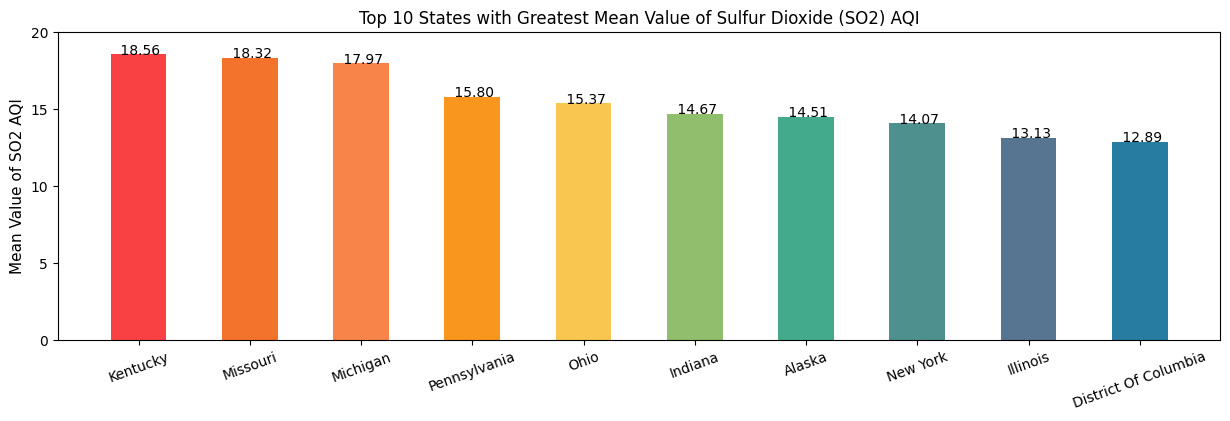

In [317]:
plt.figure(figsize= (15,4))

# Setting the labels and values for the graph as the first 10 rows
labels = so2_mean.loc[0:9, 'State']
values = so2_mean.loc[0:9, 'SO2 AQI']
color = ['#f94144', '#f3722c', '#f9844a', '#f8961e', '#f9c74f', '#90be6d', '#43aa8b', '#4d908e', '#577590', '#277da1']

# Creating the bar graph
plt.bar(labels, values, width = 0.5, color = color)
plt.title('Top 10 States with Greatest Mean Value of Sulfur Dioxide (SO2) AQI')
plt.ylabel('Mean Value of SO2 AQI', fontdict={'fontsize':11})
plt.yticks(np.arange(0,21,5))
plt.xticks(fontsize=10, rotation=20)  # change font size of the x labels

addValues(labels, values)


plt.show()

#### CO AQI and State